In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder as le


In [3]:
df = pd.read_csv('/Users/sriyabhavaraju/downloads/dfCat.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.columns

Index(['ApplicantID', '[I130]PeopleNamePetitioner',
       '[I130A]PeopleNameBeneficiary', '[I130]DOBPetitioner',
       '[I130]MailingStateFilingPetitioner',
       '[I130A]CountryOfBirthBeneficiary', '[I130A]GenderBeneficiary',
       '[I130]PassportExpiryBeneficiary', '[I130]PetitionerEthnicity',
       '[I130]PetitionerRace', '[I130]PetitionerCitizenStatus',
       '[I864]RegularIncome', '[I864]SupplementalIncome',
       '[I130]StayingTogetherStatus', '[I130]CurrentMaritalStatus',
       '[I864]FederalTaxFiled', '[I485-130]SameEmployer',
       '[I130]ImmigrationProceeding', '[I485]CriminalityProvedConvicted',
       '[I130]PreviousPetitionFiledPetitionerSameSpouse',
       '[I130]PreviousPetitionFiledDifferentSpouse', '[I130A]BeneficiaryInUS',
       '[I130-MarriageCertificate]SamePreparorNoterMinister',
       '[I130A]DOBBeneficiary', '[I130]GenderPetitioner',
       '[CALCULATED]AgeGapDays', '[CALCULATED]AgePetitioner',
       '[CALCULATED]AgeBeneficiary', '[CALCULATED]AgeGapYe

In [5]:
#remove columns 

df1 = df.drop(['ApplicantID','[I130]PeopleNamePetitioner','[I130A]PeopleNameBeneficiary','[I130]DOBPetitioner','[I130]MailingStateFilingPetitioner','[I130A]CountryOfBirthBeneficiary','[I130]PassportExpiryBeneficiary','[I864]RegularIncome', '[I864]SupplementalIncome','[I130A]DOBBeneficiary',
               '[CALCULATED]AgeGapDays', '[CALCULATED]AgePetitioner','[CALCULATED]AgeBeneficiary','[I130]DateOfMarriage', '[I130]I94DateofEntry','[I130]LastMarriageEndDatePetitioner','[I130]LastMarriageEndDateBeneficiary','[Calculated]FlagType','[Calculated]FraudDescriptive',
               '[CALCULATED]AgeGapCategorical','[CALCULATED]IncomeCheckCategorical','[CALCULATED]FederalYearsFiledCheckCategorical','[CALCULATED]TotalYearsFromLastMarriagePetitionerCategorical','[CALCULATED]TotalYearsFromLastMarriageBeneficiaryCategorical','[CALCULATED]LengthOfMarriageCategorical','[CALCULATED]DiffEntryDateAndMarriageDateCategorical','[I130-MarriageCertificate]SamePreparorNoterMinister','[I130]PreviousLegallySeperatedCountryPetitioner'],axis=1)


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   [I130A]GenderBeneficiary                                      750000 non-null  object 
 1   [I130]PetitionerEthnicity                                     750000 non-null  object 
 2   [I130]PetitionerRace                                          750000 non-null  object 
 3   [I130]PetitionerCitizenStatus                                 750000 non-null  object 
 4   [I130]StayingTogetherStatus                                   750000 non-null  object 
 5   [I130]CurrentMaritalStatus                                    750000 non-null  object 
 6   [I864]FederalTaxFiled                                         750000 non-null  object 
 7   [I485-130]SameEmployer                                  

In [7]:
# convert 2 categories into binary
df1['[I130A]GenderBeneficiary'] = df1['[I130A]GenderBeneficiary'].map({'M': 0,'F': 1})
df1['[I130]GenderPetitioner'] = df1['[I130]GenderPetitioner'].map({'M': 0,'F': 1})
df1['[I485]CriminalityProvedConvictedType'] = df1['[I485]CriminalityProvedConvictedType'].map({'Minor Reasons': 0,'Major Reasons': 1})
df1['[I130]PetitionerCitizenStatus'] = df1['[I130]PetitionerCitizenStatus'].map({'US Citizen': 0,'Lawful Permanent Resident': 1})
df1['[I130]CurrentMaritalStatus'] = df1['[I130]CurrentMaritalStatus'].map({'Married': 0,'Separated': 1})
df1['[I864]FederalTaxFiled'] = df1['[I864]FederalTaxFiled'].map({'Yes': 0,'No': 1})
df1['[I485-130]SameEmployer'] = df1['[I485-130]SameEmployer'].map({'Yes': 0,'No': 1})
df1['[I130]ImmigrationProceeding'] = df1['[I130]ImmigrationProceeding'].map({'Yes': 0,'No': 1})
df1['[I485]CriminalityProvedConvicted'] = df1['[I485]CriminalityProvedConvicted'].map({'Yes': 0,'No': 1})
df1['[I130]PreviousPetitionFiledPetitionerSameSpouse'] = df1['[I130]PreviousPetitionFiledPetitionerSameSpouse'].map({'Yes': 0,'No': 1})
df1['[I130]PreviousPetitionFiledDifferentSpouse'] = df1['[I130]PreviousPetitionFiledDifferentSpouse'].map({'Yes': 0,'No': 1})
df1['[I130A]BeneficiaryInUS'] = df1['[I130A]BeneficiaryInUS'].map({'Yes': 0,'No': 1})
df1['[Calculated]FraudLikelihood'] = df1['[Calculated]FraudLikelihood'].map({'Yes': 0,'No': 1})

In [8]:
df2= df1

In [9]:
df1 = df1.drop(['[I130]PreviousMaritalStatusBeneficiary','[I130]PreviousPetitionFiledDifferentSpouseRejectionCondition','[I130A]BeneficiaryEthnicity','[I485]CriminalityProvedConvictedType','[CALCULATED]TotalYearsFromLastMarriagePetitioner','[CALCULATED]TotalYearsFromLastMarriageBeneficiary','[CALCULATED]DiffEntryDateAndMarriageDate'], axis=1)

In [10]:
col= ['[I130]PetitionerEthnicity','[I130]PetitionerRace','[I130]StayingTogetherStatus','[I130]PreviousMaritalStatusPetitioner',
     '[I130]PreviousFiledPetitionerSameSpouseRejectionCondition','[I864]FederalTaxFiledYears']

for i in col:
    print(i)
    one_hot = pd.get_dummies(df1[i])
    df1 = df1.drop(i, axis = 1)
    df1 = df1.join(one_hot)

[I130]PetitionerEthnicity
[I130]PetitionerRace
[I130]StayingTogetherStatus
[I130]PreviousMaritalStatusPetitioner
[I130]PreviousFiledPetitionerSameSpouseRejectionCondition
[I864]FederalTaxFiledYears


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 42 columns):
 #   Column                                           Non-Null Count   Dtype
---  ------                                           --------------   -----
 0   [I130A]GenderBeneficiary                         750000 non-null  int64
 1   [I130]PetitionerCitizenStatus                    750000 non-null  int64
 2   [I130]CurrentMaritalStatus                       750000 non-null  int64
 3   [I864]FederalTaxFiled                            750000 non-null  int64
 4   [I485-130]SameEmployer                           750000 non-null  int64
 5   [I130]ImmigrationProceeding                      750000 non-null  int64
 6   [I485]CriminalityProvedConvicted                 750000 non-null  int64
 7   [I130]PreviousPetitionFiledPetitionerSameSpouse  750000 non-null  int64
 8   [I130]PreviousPetitionFiledDifferentSpouse       750000 non-null  int64
 9   [I130A]BeneficiaryInUS               

In [12]:
# Train Test Split

Prediction = df1['[Calculated]FraudLikelihood']
Features = df1.drop(columns = ['[Calculated]FraudLikelihood'])
    
X = Features
Y = Prediction
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(562500, 41)
(562500,)
(187500, 41)
(187500,)


In [13]:
# Logistic Regresion
model = LogisticRegression()
# Model is learning relationship 
model.fit(X_train,Y_train)

# Model to make test predictions
y_pred = model.predict(X_test)


print(classification_report(Y_test,y_pred))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77     78812
           1       0.80      0.93      0.86    108688

    accuracy                           0.83    187500
   macro avg       0.84      0.81      0.81    187500
weighted avg       0.83      0.83      0.82    187500

Accuracy of the model
0.8264


In [16]:
#Random Forest 
mode2 = RandomForestClassifier()
mode2.fit(X_train,Y_train)
y_pred_random = mode2.predict(X_test)

print(classification_report(Y_test,y_pred_random))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred_random))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     78812
           1       1.00      1.00      1.00    108688

    accuracy                           1.00    187500
   macro avg       1.00      1.00      1.00    187500
weighted avg       1.00      1.00      1.00    187500

Accuracy of the model
0.996


In [20]:
import numpy as np
def importantFeatures(X_train, rf):
    names = list(X_train.columns)
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    new_indices = indices[:20]
    features = X_train.columns[indices]
    indices = rf.feature_importances_[indices]
    f1 = features
    i1 = indices
    features = list(features[:20])
    indices = list(indices[:20])
    return features, indices, f1, i1

In [41]:
def featurePlot(features, indices, X_train, X_test, Y_train, Y_test):
    acc = []
    for i in range(1, 25):
        x = X_train[features[:i]]
        R = RandomForestClassifier()
        R.fit(x, Y_train)
        xtest = X_test[features[:i]]
        y_pred = R.predict(xtest)
        acc1 = accuracy_score(y_pred, Y_test)
        print(features[:i])
        print(acc1)
        acc.append(acc1)
    return acc

In [39]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
def plotFeatureImportance(features, indices):
    figure(figsize=(8, 6), dpi=80)
    x1 = [i for i in features[::-1]]
    x2 = [i for i in indices[::-1]]
    plt.barh(x1, x2, align = 'center')
    #plt.yticks(range(n), [features[i] for i in indices[-n:]])
    #plt.xticks([0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225, 0.025])
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance plot on Dataset 1')

['Same House', '[I130A]BeneficiaryInUS', '[CALCULATED]AgeGapYears', '[I864]NumberOfDependents', '3 or 3+ years', '[CALCULATED]TotalIncome', '[CALCULATED]LengthOfMarriage', '[CALCULATED]FederalPovertyLineValue', '[I130]CurrentMaritalStatus', 'Under 3 years', 'Different States', '[I485]CriminalityProvedConvicted', '[I130]ImmigrationProceeding', 'Same State - Different Address', '[I485-130]SameEmployer', '[I864]FederalTaxFiled', '[I130]NumberOfMarriagesBeneficiary', '[I130]NumberOfMarriagesPetitioner', '[CALCULATED]YearsSinceDateofEntry', '[I130]PreviousPetitionFiledDifferentSpouse']
[0.1219935215715355, 0.11314796404773, 0.1024625573642258, 0.09683347594284014, 0.08479901248512607, 0.0785303661358505, 0.07832050270640631, 0.0721350205691336, 0.037155140165821894, 0.03686212372083499, 0.03559983290920214, 0.02828361502402018, 0.025204524044739406, 0.021058346365126428, 0.01340809632079868, 0.008860902064123363, 0.008673664682289037, 0.00807849289837469, 0.007751579867234662, 0.00646262243

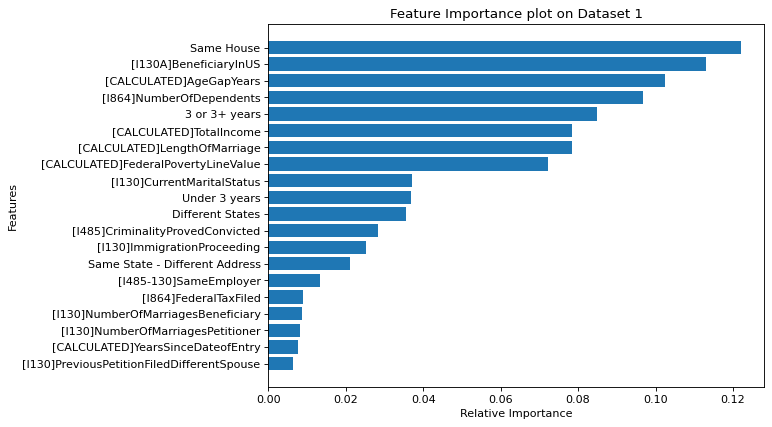

In [37]:
features, indices, f1, i1 = importantFeatures(X_train, mode2)
plotFeatureImportance(features, indices)


In [50]:
acc = featurePlot(f1, i1,  X_train, X_test, Y_train, Y_test)

Index(['Same House'], dtype='object')
0.7483306666666667
Index(['Same House', '[I130A]BeneficiaryInUS'], dtype='object')
0.8034613333333334
Index(['Same House', '[I130A]BeneficiaryInUS', '[CALCULATED]AgeGapYears'], dtype='object')
0.8745226666666667
Index(['Same House', '[I130A]BeneficiaryInUS', '[CALCULATED]AgeGapYears',
       '[I864]NumberOfDependents'],
      dtype='object')
0.891024
Index(['Same House', '[I130A]BeneficiaryInUS', '[CALCULATED]AgeGapYears',
       '[I864]NumberOfDependents', '3 or 3+ years'],
      dtype='object')
0.9308266666666667
Index(['Same House', '[I130A]BeneficiaryInUS', '[CALCULATED]AgeGapYears',
       '[I864]NumberOfDependents', '3 or 3+ years', '[CALCULATED]TotalIncome'],
      dtype='object')
0.927456
Index(['Same House', '[I130A]BeneficiaryInUS', '[CALCULATED]AgeGapYears',
       '[I864]NumberOfDependents', '3 or 3+ years', '[CALCULATED]TotalIncome',
       '[CALCULATED]LengthOfMarriage'],
      dtype='object')
0.9485653333333334
Index(['Same House', '

Text(0, 0.5, 'Accuracy Obtained')

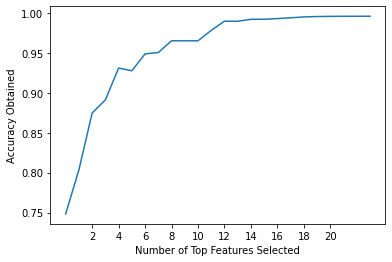

In [52]:
plt.plot(list(range(0, 24)), acc)
plt.xticks([2,4,6,8,10,12,14,16,18,20])
# plt.yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6])
plt.xlabel('Number of Top Features Selected')
plt.ylabel('Accuracy Obtained')

In [13]:
############### KNN
def knn_neighbors(i,X_train, Y_train, X_test, Y_test):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(X_train, Y_train)
    y_pred =model_knn.predict(X_test)
    return accuracy_score(Y_test, y_pred)

In [14]:
acc_knn = []
for i in range(1,10):
    acc_knn.append(knn_neighbors(i,X_train, Y_train, X_test, Y_test))

Text(0, 0.5, 'Accuracy Obtained')

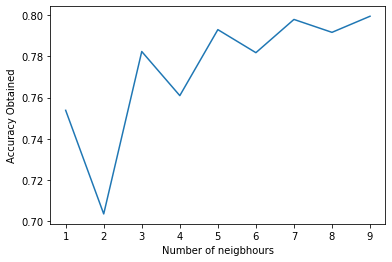

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)), acc_knn)
plt.xlabel('Number of neigbhours')
plt.ylabel('Accuracy Obtained')

In [ ]:
#features
def main():
    X_train, X_test, Y_train, Y_test = readTestFiles()
    
    return features, indices, acc

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
# Model is learning relationship 
model3.fit(X_train,Y_train)

# Model to make test predictions
y_pred = model3.predict(X_test)


print(classification_report(Y_test,y_pred))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.62      0.71     78812
           1       0.77      0.92      0.84    108688

    accuracy                           0.79    187500
   macro avg       0.81      0.77      0.78    187500
weighted avg       0.80      0.79      0.79    187500

Accuracy of the model
0.7929813333333333


In [35]:
from sklearn.naive_bayes import GaussianNB
mode4 = GaussianNB()
# Model is learning relationship 
mode4.fit(X_train,Y_train)

# Model to make test predictions
y_pred = mode4.predict(X_test)


print(classification_report(Y_test,y_pred))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.54      0.68     78812
           1       0.74      0.98      0.84    108688

    accuracy                           0.79    187500
   macro avg       0.84      0.76      0.76    187500
weighted avg       0.83      0.79      0.78    187500

Accuracy of the model
0.7917013333333334


In [36]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier()
model5.fit(X_train,Y_train)
y_pred_knn = model5.predict(X_test)

print(classification_report(Y_test,y_pred_knn))
print('Accuracy of the model')
print(accuracy_score(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     78812
           1       0.99      0.99      0.99    108688

    accuracy                           0.99    187500
   macro avg       0.99      0.99      0.99    187500
weighted avg       0.99      0.99      0.99    187500

Accuracy of the model
0.9940426666666666
